In [40]:
def bestSolution(pop, privacy, energy, accur):
    best, fitness =  sorted(pop.items(), key=lambda x: x[1], reverse=True)[0]
    return best, fitness, privacy[best], energy[best], accur[best]
def showPop(pop, privacy, energy, accur):
    print("key| fitness| privacy| energy| accur")
    for k, v in sorted(pop.items(), key=lambda x: x[1], reverse=True):
        print(k, v, privacy[k], energy[k], accur[k])

In [41]:
from es import load_file
fileList = list(map(str, range(500)))
import os.path as osp
fileDir = '/home/marcguo/lzq/work-dir/privacy-refactor/log/resnet50/2021_10_12T15_12_33'
pop_iter = {}
for file in fileList:
    pop = {}
    path = osp.join(fileDir, file)
    load_file(pop, path)
    pop_iter[int(file)] = pop

In [42]:
def load_mem(mem_dir):
    privacy = {}
    energy = {}
    accur = {}
    load_file(privacy, osp.join(mem_dir, 'privacy.log'))
    load_file(energy, osp.join(mem_dir, 'energy.log'))
    load_file(accur, osp.join(mem_dir, 'accur.log'))
    return privacy, energy, accur

mem_dir = '/home/marcguo/lzq/work-dir/privacy-refactor/mem/resnet50'
privacy, energy, accur = load_mem(mem_dir=mem_dir)

In [ ]:
# showPop(pop_iter[999], privacy, energy, accur)
bestSolution(pop_iter[499], privacy, energy, accur)

In [43]:
from quantize_utils import *
from models.mobilenet import *
from models.resnet import *
# lenQmodel(qmobilenet(), layer_type=[BasicConv2d, DepthSeperabelConv2d])
lenQmodel(qresnet50(), layer_type=[BottleNeck, BasicBlock])

16

In [44]:
best_fitness = []
best_energy = []
best_accur = []

for i in range(500):
    _, f, _, e, a = bestSolution(pop_iter[i], privacy, energy, accur)
    best_fitness.append(f)
    best_energy.append(e)
    best_accur.append(a)

for i in range(500):
    best_fitness.append(best_fitness[-1])

In [ ]:
len(best_fitness)

In [46]:
import csv
filePath ='data/resnet50-iter.csv'
with open(filePath, 'w') as f:
    writer = csv.writer(f)
    for i, F in enumerate(best_fitness):
        writer.writerow([i, F])

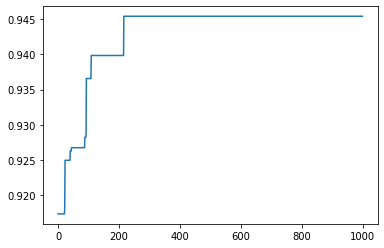

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(len(best_fitness)), best_fitness)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(len(best_energy)), best_energy, label='energy')

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(len(best_accur)), best_accur, label='energy')

# Final Finetune

In [ ]:
from models.resnet import qresnet18, resnet50
from utils import cifar100DataLoader, finetune, test
from quantize_utils import load_qnet, mixed_quantize_with_partition, privacy_eval
import conf

In [ ]:
from models.mobilenetv2 import mobilenetv2
resnet50()

In [ ]:
trainLoader = cifar100DataLoader(train=True, shuffle=True, normalized=True, batch_size=256)
testLoader = cifar100DataLoader(train=False, shuffle=False, normalized=True, batch_size=512)


In [ ]:
qnet = qresnet18()
load_qnet(qnet, conf.resnet18_path)
split, pi = (14, (6, 2, 6, 2, 8, 6, 4, 6, 8, 8, 6, 4, 8, 2, 4, 8, 6, 4, 6))
mixed_quantize_with_partition(qnet, strategy=pi, split=split)

In [ ]:
test(qnet, testLoader, device='cuda')

In [ ]:
finetune(qnet, trainloader=trainLoader, epochs=10, device='cuda', testloader=testLoader)

In [ ]:
privacy_eval(qnet, trainLoader, device='cuda')

# log 替换原值

In [ ]:
import math
a = [1.34, 3.52, 4.6, 4.73, 4.79, 5.12, 5.4, 5.8]

In [ ]:
a = [3.4657461643218994, 3.4868290424346924, 3.515005111694336, 3.5801552295684814, 3.6973135471343994]

In [ ]:
[math.log10(b) for b in a]